# Importing Libraries



In [1]:
import pandas as pd
from IPython.display import display
from tabulate import tabulate 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve , f1_score , plot_precision_recall_curve 
import seaborn as sns
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [2]:
shoppers = pd.read_csv('Coursework_1_data.csv')
shoppers.columns = map(str.lower, shoppers.columns)

# Data Exploration

In [3]:
shoppers.shape

(12330, 18)

In [4]:
display(shoppers)

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [5]:
shoppers.describe()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,operatingsystems,browser,region,traffictype
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
print(shoppers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           12330 non-null  int64  
 1   administrative_duration  12330 non-null  float64
 2   informational            12330 non-null  int64  
 3   informational_duration   12330 non-null  float64
 4   productrelated           12330 non-null  int64  
 5   productrelated_duration  12330 non-null  float64
 6   bouncerates              12330 non-null  float64
 7   exitrates                12330 non-null  float64
 8   pagevalues               12330 non-null  float64
 9   specialday               12330 non-null  float64
 10  month                    12330 non-null  object 
 11  operatingsystems         12330 non-null  int64  
 12  browser                  12330 non-null  int64  
 13  region                   12330 non-null  int64  
 14  traffictype           

In [7]:
revenue_count = pd.DataFrame(shoppers["revenue"].value_counts())
print(tabulate(revenue_count, headers = 'keys', tablefmt = 'orgtbl'))

|       |   revenue |
|-------+-----------|
| False |     10422 |
| True  |      1908 |


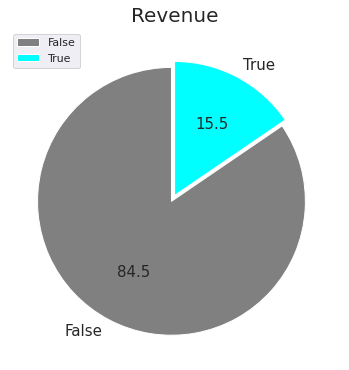

In [8]:
plt.figure(figsize=(6,7))
shoppers['revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.05,0),colors=['grey','cyan'])
plt.title('Revenue', fontsize = 20)
plt.ylabel('')
plt.legend()

Corplot for correlation between numerical features

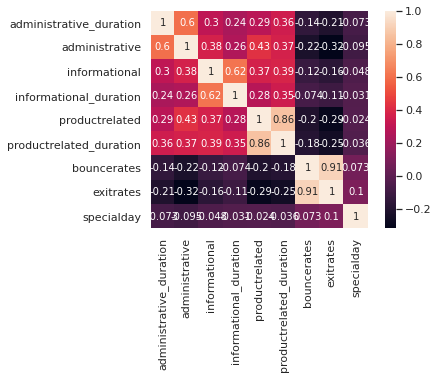

In [9]:
#f,ax=plt.subplots(figsize=(12,8))
correlation=shoppers[['administrative_duration','administrative','informational','informational_duration','productrelated','productrelated_duration','bouncerates','exitrates','specialday']].corr()
correlation
sns.heatmap(correlation,annot=True,square=True)

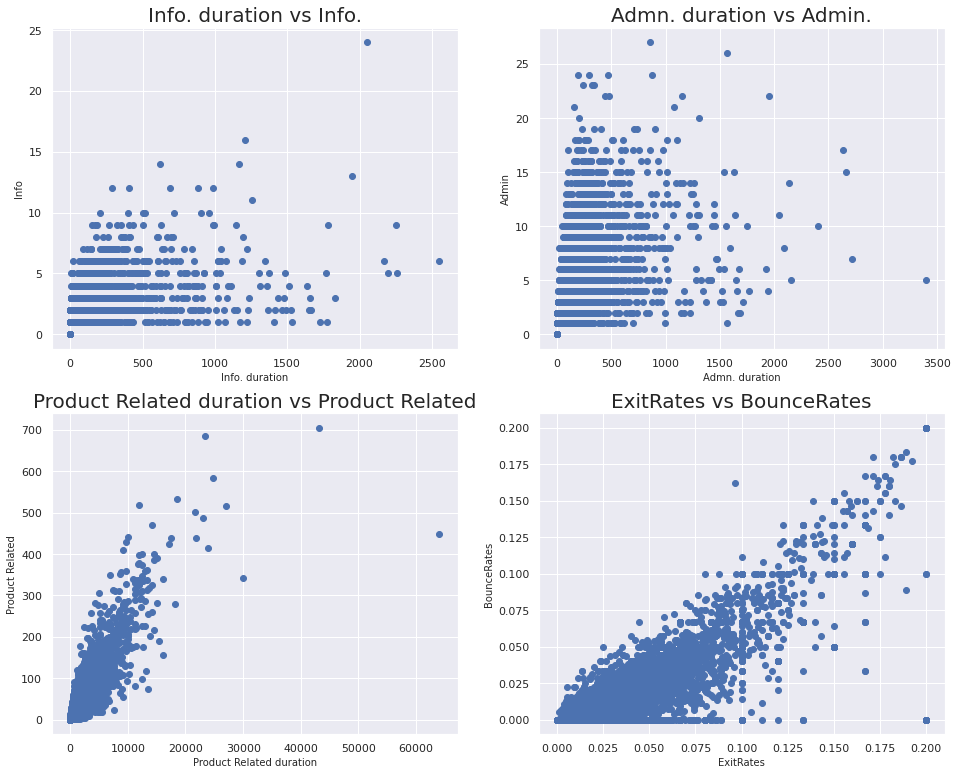

In [10]:
plt.rcParams['figure.figsize'] = (16, 13)
 
plt.subplot(2, 2, 1)
plt.scatter('informational_duration','informational',data = shoppers)
plt.title('Info. duration vs Info.', fontsize = 20)
plt.xlabel('Info. duration', fontsize = 10)
plt.ylabel('Info', fontsize = 10)
 
# product related duration vs revenue
 
plt.subplot(2, 2, 2)
plt.scatter('administrative_duration','administrative',data = shoppers)
plt.title('Admn. duration vs Admin.', fontsize = 20)
plt.xlabel('Admn. duration', fontsize = 10)
plt.ylabel('Admin', fontsize = 10)
 
# product related duration vs revenue
 
plt.subplot(2, 2, 3)
plt.scatter('productrelated_duration','productrelated',data = shoppers)
plt.title('Product Related duration vs Product Related', fontsize = 20)
plt.xlabel('Product Related duration', fontsize = 10)
plt.ylabel('Product Related', fontsize = 10)
 
# exit rate vs revenue
 
plt.subplot(2, 2, 4)
plt.scatter('exitrates','bouncerates',data = shoppers)
plt.title('ExitRates vs BounceRates', fontsize = 20)
plt.xlabel('ExitRates', fontsize = 10)
plt.ylabel('BounceRates', fontsize = 10)
plt.show()

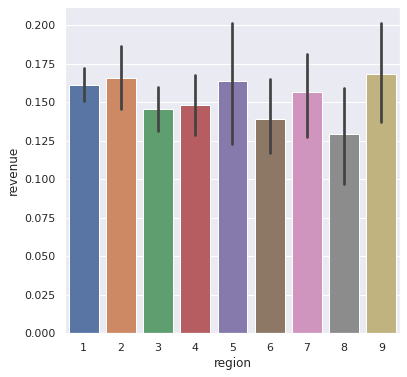

In [11]:
plt.figure(figsize=(6,6))
sns.barplot(x='region',y='revenue',data=shoppers)

+----+---------+----------------+-----------------+--------------------+
|    | month   |   revenue_true |   revenue_false | Percent_true       |
|----+---------+----------------+-----------------+--------------------|
| 1  | Aug     |             76 |             357 | 21.288515406162464 |
| 2  | Dec     |            216 |            1511 | 14.295168762409    |
| 3  | Feb     |              3 |             181 | 1.6574585635359116 |
| 4  | Jul     |             66 |             366 | 18.0327868852459   |
| 5  | June    |             29 |             259 | 11.196911196911197 |
| 6  | Mar     |            192 |            1715 | 11.19533527696793  |
| 7  | May     |            365 |            2999 | 12.17072357452484  |
| 8  | Nov     |            760 |            2238 | 33.958891867739055 |
| 9  | Oct     |            115 |             434 | 26.497695852534562 |
| 10 | Sep     |             86 |             362 | 23.756906077348066 |
|    | total   |           1908 |           10422 |

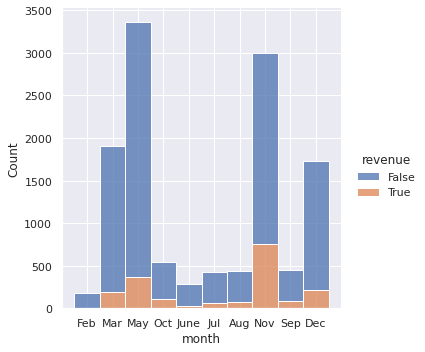

In [12]:
counts=[]
count_false = []
x=list(shoppers['revenue'])
y=list(shoppers['month'])
new_list=['Aug','Dec','Feb','Jul','June','Mar','May','Nov','Oct','Sep']
month_list=['Aug','Dec','Feb','Jul','June','Mar','May','Nov','Oct','Sep','total']

new_list[0]
for j in range(len(new_list)):
  count=0
  for i in range(len(x)):
    if y[i]==new_list[j] and x[i]==1:
      count+=1
  counts.append(count)
  X=(count)

for j in range(len(new_list)):
  count=0
  for i in range(len(x)):
    if y[i]==new_list[j] and x[i]==0:
      count+=1
  # counts.append(count)
  count_false.append(count)
  X=(count)

ratio_list =[] 
ratio = 0

for  i in range(len(new_list)):
  ratio = counts[i]/count_false[i]
  ratio = ratio*100
  ratio_list.append(ratio)

total_true = 0
total_false = 0
for i in range(0, len(counts)):
    total_true = total_true + counts[i]
# print(total_true)

for i in range(0, len(count_false)):
    total_false = total_false + count_false[i]
# print(total_false)

counts.append(total_true)
count_false.append(total_false)
ratio_list.append('')
New_list_DataFrame=DataFrame(month_list,columns=["month"],index=[1,2,3,4,5,6,7,8,9,10,""])
DATA=DataFrame(counts,columns=["revenue_true"],index=[1,2,3,4,5,6,7,8,9,10,""])
DATA_false=DataFrame(count_false,columns=["revenue_false"],index=[1,2,3,4,5,6,7,8,9,10,""])
ratio_col = DataFrame(ratio_list,columns=["Percent_true"],index=[1,2,3,4,5,6,7,8,9,10,""])
Data_con=pd.concat([New_list_DataFrame,DATA,DATA_false,ratio_col],axis="columns")
# (Data_con.style.format('${0:,.2f}')
# display(Data_con)
print(tabulate(Data_con, headers = 'keys', tablefmt = 'psql'))

print('\n')
sns.displot(shoppers, x="month", hue="revenue" ,multiple = "stack")

,visitor_type,revenue_true,revenue_false,Percent_true
1,Returning_Visitor,1470,9081,16.1876
2,New_Visitor,422,1272,33.1761
3,Other,16,69,23.1884
4,total,1908,10422,


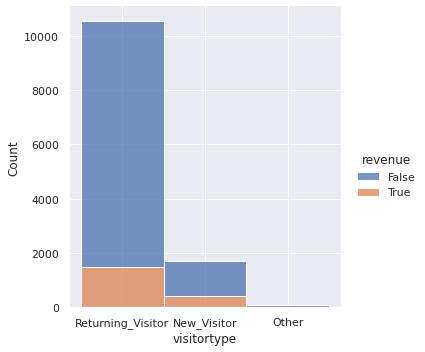

In [13]:
counts=[]
count_false = []
x=list(shoppers['revenue'])
y=list(shoppers['visitortype'])
new_list=['Returning_Visitor','New_Visitor','Other']
month_list=['Returning_Visitor','New_Visitor','Other','total']

new_list[0]
for j in range(len(new_list)):
  count=0
  for i in range(len(x)):
    if y[i]==new_list[j] and x[i]==1:
      count+=1
  counts.append(count)
  X=(count)

for j in range(len(new_list)):
  count=0
  for i in range(len(x)):
    if y[i]==new_list[j] and x[i]==0:
      count+=1
  # counts.append(count)
  count_false.append(count)
  X=(count)

ratio_list =[] 
ratio = 0

for  i in range(len(new_list)):
  ratio = counts[i]/count_false[i]
  ratio = ratio*100
  ratio_list.append(ratio)

total_true = 0
total_false = 0
for i in range(0, len(counts)):
    total_true = total_true + counts[i]
# print(total_true)

for i in range(0, len(count_false)):
    total_false = total_false + count_false[i]
# print(total_false)

counts.append(total_true)
count_false.append(total_false)
ratio_list.append('')
New_list_DataFrame=DataFrame(month_list,columns=["visitor_type"],index=[1,2,3,4])
DATA=DataFrame(counts,columns=["revenue_true"],index=[1,2,3,4])
DATA_false=DataFrame(count_false,columns=["revenue_false"],index=[1,2,3,4])
ratio_col = DataFrame(ratio_list,columns=["Percent_true"],index=[1,2,3,4])
Data_con=pd.concat([New_list_DataFrame,DATA,DATA_false,ratio_col],axis="columns")
display(Data_con)
print('\n')
sns.displot(shoppers, x="visitortype", hue="revenue", multiple = "stack")

In [14]:
counts=[]
x=list(shoppers['revenue'])
y=list(shoppers['operatingsystems'])
new_list=[1,2,3,4,5,6,7,8]
new_list[0]
for j in range(len(new_list)):
  count=0
  for i in range(len(x)):
    if y[i]==new_list[j]:
      count+=1
  counts.append(count)
  X=(count)
New_list_DataFrame=DataFrame(new_list,columns=["Operating System"],index=[1,2,3,4,5,6,7,8])
DATA=DataFrame(counts,columns=["Sessions"],index=[1,2,3,4,5,6,7,8])
Data_con=pd.concat([New_list_DataFrame,DATA],axis="columns")
Data_con

print(tabulate(Data_con, headers = 'keys', tablefmt = 'git'))

      Operating System    Sessions
--  ------------------  ----------
 1                   1        2585
 2                   2        6601
 3                   3        2555
 4                   4         478
 5                   5           6
 6                   6          19
 7                   7           7
 8                   8          79


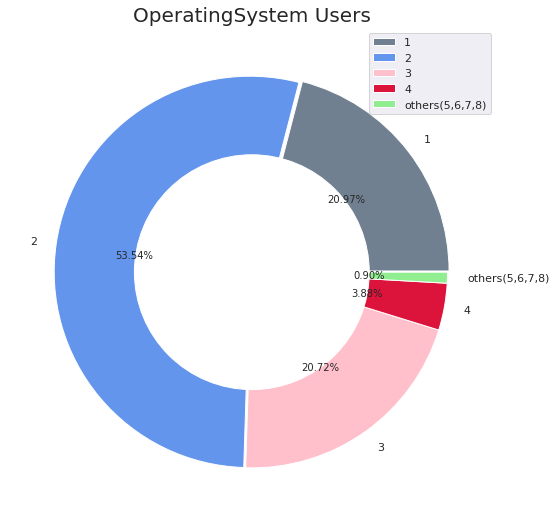

In [15]:
size = [2585,6601, 2555,478,111]
colors = ['slategray', 'cornflowerblue', 'pink', 'crimson', 'lightgreen']
labels = "1","2","3","4","others(5,6,7,8)"
explode = [0.01, 0.01, 0, 0,0]

circle = plt.Circle((0, 0), 0.6, color = 'white')
# plt.subplot(1, 5, 1)
plt.figure(figsize=(9,9))
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.title('OperatingSystem Users', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

# Data Preprocessing

##### Finding missing values

In [16]:
shoppers.isna().sum()

administrative             0
administrative_duration    0
informational              0
informational_duration     0
productrelated             0
productrelated_duration    0
bouncerates                0
exitrates                  0
pagevalues                 0
specialday                 0
month                      0
operatingsystems           0
browser                    0
region                     0
traffictype                0
visitortype                0
weekend                    0
revenue                    0
dtype: int64

##### Changing data type of weekend and revenue to integer.

In [17]:
shoppers['weekend'] = shoppers['weekend'].astype(np.int)
shoppers['revenue'] = shoppers['revenue'].astype(np.int)

##### Label encoding on month column and one hot encoding on visitor type

In [18]:
month_ordering = ['month','Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

visitor_prefix = 'V'

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, column, prefix):
    shoppers = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

shoppers = ordinal_encode(
    shoppers,
    'month',
    month_ordering
)

shoppers = onehot_encode(
    shoppers,
    'visitortype',
    visitor_prefix
)

In [19]:
shoppers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   administrative           12330 non-null  int64  
 1   administrative_duration  12330 non-null  float64
 2   informational            12330 non-null  int64  
 3   informational_duration   12330 non-null  float64
 4   productrelated           12330 non-null  int64  
 5   productrelated_duration  12330 non-null  float64
 6   bouncerates              12330 non-null  float64
 7   exitrates                12330 non-null  float64
 8   pagevalues               12330 non-null  float64
 9   specialday               12330 non-null  float64
 10  month                    12330 non-null  int64  
 11  operatingsystems         12330 non-null  int64  
 12  browser                  12330 non-null  int64  
 13  region                   12330 non-null  int64  
 14  traffictype           

##### outliers detection

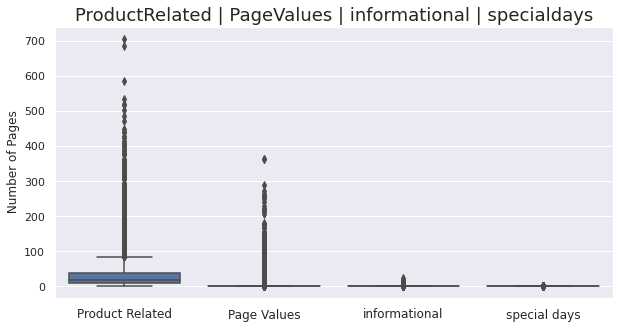

In [20]:
fig = plt.figure(figsize=(10, 5))
plt.title("ProductRelated | PageValues | informational | specialdays", fontsize=18)
ax = sns.boxplot(data=(shoppers['productrelated'],shoppers['pagevalues'],shoppers['informational'],shoppers['specialday']) )
ax.set_xticklabels(['Product Related', 'Page Values','informational','special days'],fontsize=12)
ax.set_ylabel(" Number of Pages", fontsize=12)
plt.show()

##### Standard Scaling numerical features

In [21]:
from sklearn.preprocessing import StandardScaler 
# from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['administrative',
 'administrative_duration',
 'informational',
 'informational_duration',
 'productrelated',
 'productrelated_duration',
 'bouncerates',
 'exitrates',
 'pagevalues','specialday']

scaler = StandardScaler()
# scaler = MinMaxScaler()

shoppers[cols_to_scale] = scaler.fit_transform(shoppers[cols_to_scale])



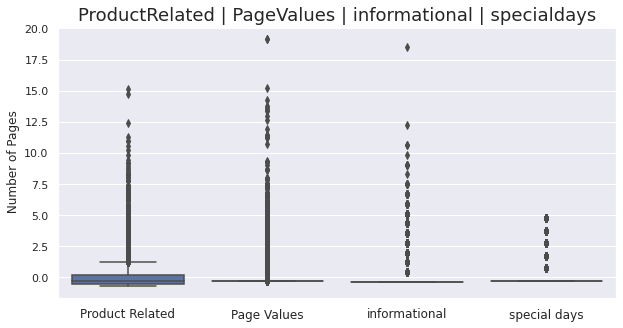

In [22]:
fig = plt.figure(figsize=(10, 5))
plt.title("ProductRelated | PageValues | informational | specialdays", fontsize=18)
ax = sns.boxplot(data=(shoppers['productrelated'],shoppers['pagevalues'],shoppers['informational'],shoppers['specialday']) )
ax.set_xticklabels(['Product Related', 'Page Values','informational','special days'],fontsize=12)
ax.set_ylabel(" Number of Pages", fontsize=12)
plt.show()

##### feature extraction (correlation matrix)

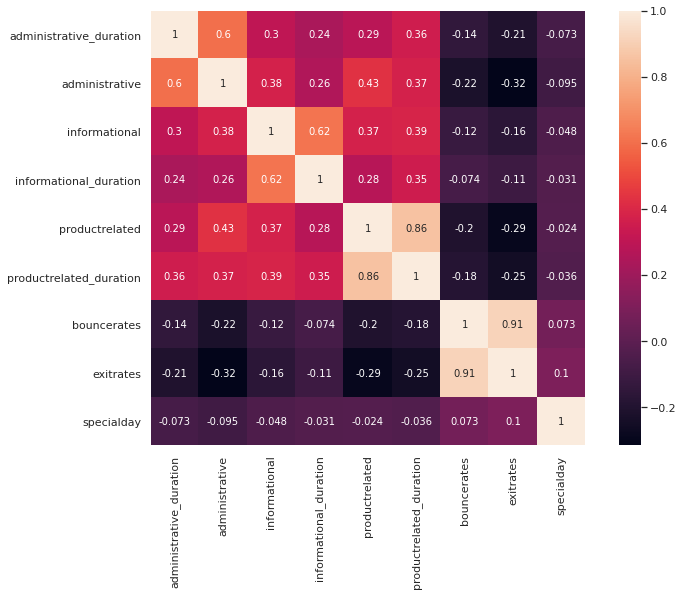

In [23]:
f,ax=plt.subplots(figsize=(12,8))
correlation=shoppers[['administrative_duration','administrative','informational','informational_duration','productrelated','productrelated_duration','bouncerates','exitrates','specialday']].corr()
sns.heatmap(correlation,annot=True,square=True)

In [24]:
shoppers=shoppers.drop(['administrative_duration','informational_duration','productrelated_duration','exitrates'],axis='columns')

##### Splitting and applying SMOTE

In [25]:
x = shoppers.drop('revenue', axis=1)
y = shoppers['revenue']

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

x_sm, y_sm = sm.fit_resample(x, y)

print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {x_sm.shape}''')

Shape of X before SMOTE: (12330, 15)
Shape of X after SMOTE: (20844, 15)


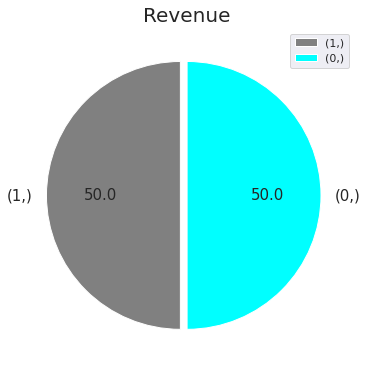

In [27]:
plt.figure(figsize=(6,7))
list_Revenue=pd.DataFrame(y_sm)
list_Revenue.value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.05,0),colors=['grey','cyan'])
plt.title('Revenue', fontsize = 20)
plt.ylabel('')
plt.legend()

# Model Implementation

##### Spliting data train and test

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_sm, y_sm, test_size=0.3, random_state=42
)
print(f'''Shape of x train dataset: {x_train.shape}
Shape of x test dataset: {x_test.shape}
Shape of y train dataset: {y_train.shape}
Shape of y test dataset: {y_test.shape}''')

Shape of x train dataset: (14590, 15)
Shape of x test dataset: (6254, 15)
Shape of y train dataset: (14590,)
Shape of y test dataset: (6254,)


In [29]:
from mlxtend.plotting import plot_confusion_matrix
def ConfusionMatrix(A,B):
  CM=confusion_matrix(A, B)
  fig, ax = plot_confusion_matrix(CM,show_absolute=True,show_normed=True,colorbar=True)
  plt.show()

### Support Vector classifier (SVC)

Support Vector classifier Regression:
Training Accuracy : 0.836257710760795
Testing Accuracy : 0.8351455068755996
              precision    recall  f1-score   support

           0       0.79      0.90      0.85      3123
           1       0.89      0.77      0.82      3131

    accuracy                           0.84      6254
   macro avg       0.84      0.84      0.83      6254
weighted avg       0.84      0.84      0.83      6254



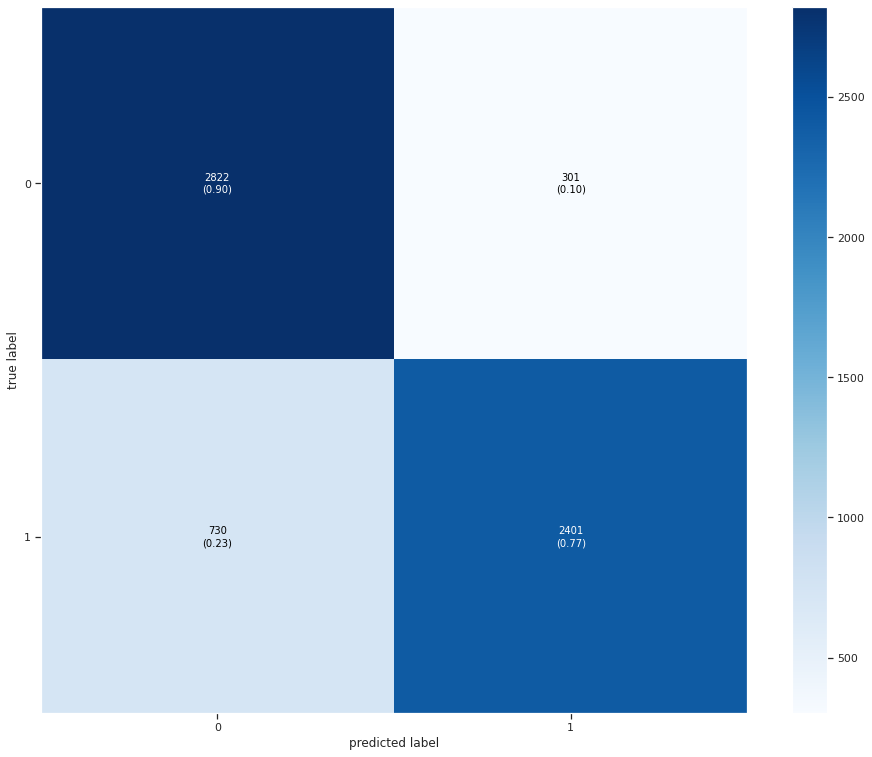

In [30]:
svc = SVC(kernel='linear', C=10, gamma= 'auto', probability=True)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
yhat = svc.predict(x_train)
print("Support Vector classifier Regression:")
print("Training Accuracy :", svc.score(x_train, y_train))
print("Testing Accuracy :", svc.score(x_test, y_test))
print(classification_report(y_test, y_pred_svc))
ConfusionMatrix(y_test,y_pred_svc)

In [31]:
param_grid = {'C': [1, 10, 100],'kernel': ['rbf', 'sigmoid','linear']}
clf = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
clf.fit(x_test,y_pred_svc)

# clf.cv_results_
print("The best hyperparameters for SVC classifier is : ",clf.best_params_)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. C=1, kernel=rbf, total=   0.4s
[CV] C=1, kernel=rbf .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .................................. C=1, kernel=rbf, total=   0.5s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.4s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.4s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.5s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=   0.8s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=   0.8s
[CV] C=1, kernel=sigmoid .............................................
[CV] .............................. C=1, kernel=sigmoid, total=   0.7s
[CV] C=1, kernel=sigmoid .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   17.7s finished


The best hyperparameters for SVC classifier is :  {'C': 100, 'kernel': 'linear'}


### Random Forest

Random Forest Regression:
Training Accuracy : 0.9796435915010281
Testing Accuracy : 0.9309242085065558
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3123
           1       0.92      0.95      0.93      3131

    accuracy                           0.93      6254
   macro avg       0.93      0.93      0.93      6254
weighted avg       0.93      0.93      0.93      6254



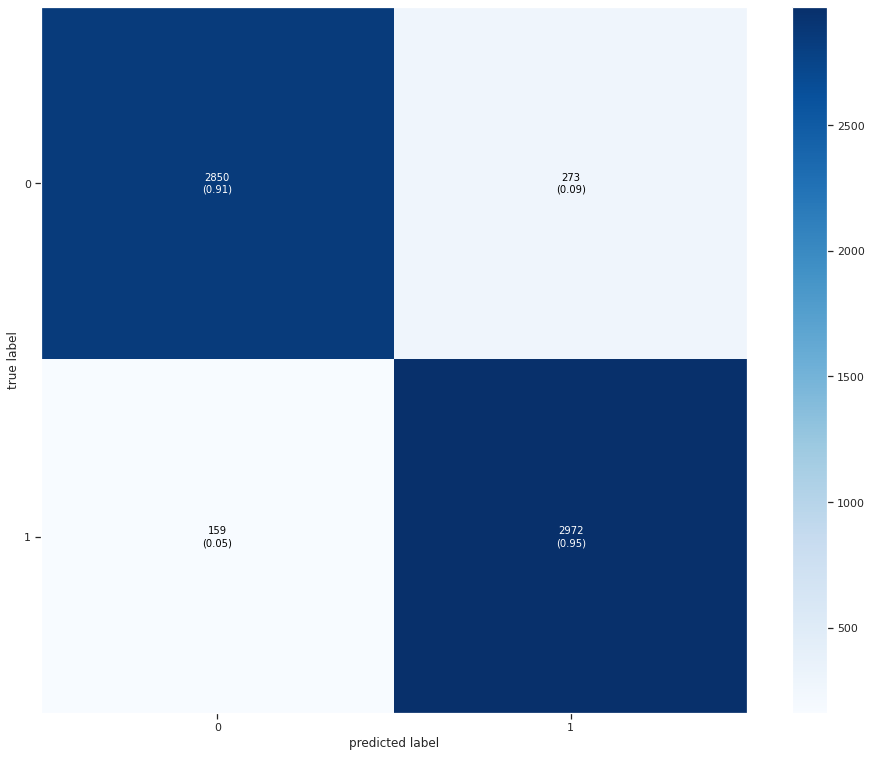

In [32]:
rf = RandomForestClassifier(min_samples_leaf=2,min_samples_split=5,random_state=100)
rf_model = rf.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
y_train_rf = rf_model.predict(x_train)
print("Random Forest Regression:")
print("Training Accuracy :", rf_model.score(x_train, y_train))
print("Testing Accuracy :", rf_model.score(x_test, y_test))
print(classification_report(y_test, y_pred_rf))
ConfusionMatrix(y_test,y_pred_rf)

In [33]:
clf = GridSearchCV(RandomForestClassifier(random_state=100), {
    'min_samples_leaf': [0,2,3,5,10],
    'min_samples_split': [1,5,10,15,20]
}, cv=5, return_train_score=False)
clf.fit(x_test,y_pred_rf)
# clf.cv_results_
model_data=pd.DataFrame(clf.cv_results_)
print(model_data[['param_min_samples_leaf','param_min_samples_split','mean_test_score']])
# print("best score is :",clf.best_score_)
print("The best hyperparameters for Random forest is : ",clf.best_params_)

   param_min_samples_leaf param_min_samples_split  mean_test_score
0                       0                       1              NaN
1                       0                       5              NaN
2                       0                      10              NaN
3                       0                      15              NaN
4                       0                      20              NaN
5                       2                       1              NaN
6                       2                       5         0.957628
7                       2                      10         0.957627
8                       2                      15         0.955389
9                       2                      20         0.954270
10                      3                       1              NaN
11                      3                       5         0.956828
12                      3                      10         0.955069
13                      3                      15         0.95

### Logistic regression

Logistic Regression:
Training Accuracy : 0.8296778615490061
Testing Accuracy : 0.8281100095938599
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      3123
           1       0.88      0.76      0.82      3131

    accuracy                           0.83      6254
   macro avg       0.83      0.83      0.83      6254
weighted avg       0.83      0.83      0.83      6254



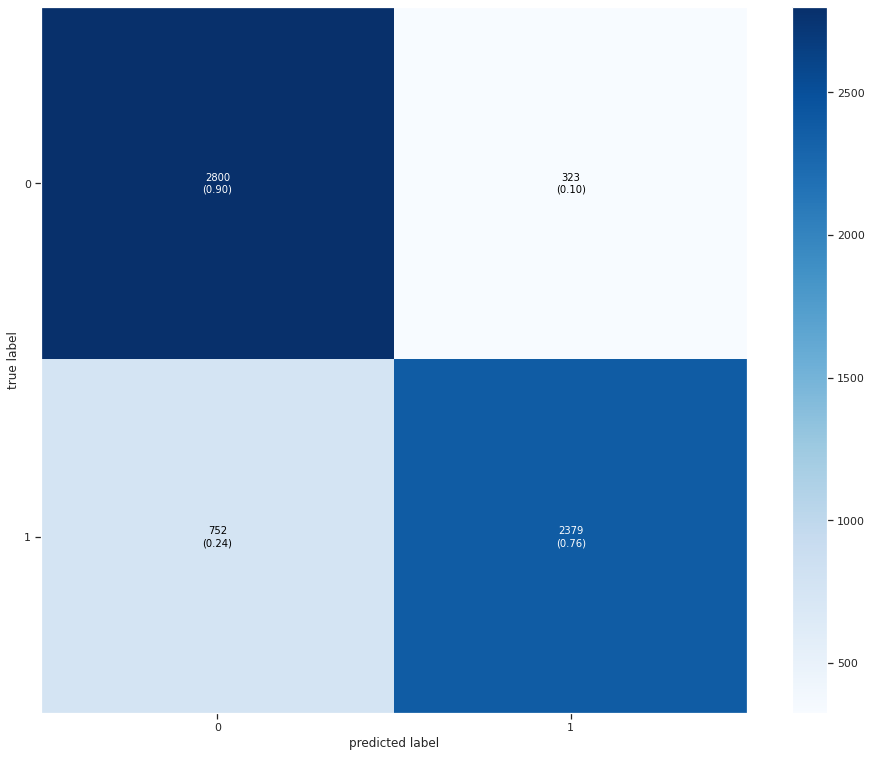

In [34]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression(random_state = 50, max_iter = 5000, penalty= 'l2', solver= 'liblinear',C= 1)
lr = logis.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression:")
print("Training Accuracy :", logis.score(x_train, y_train))
print("Testing Accuracy :", logis.score(x_test, y_test))
print(classification_report(y_test, y_pred_lr))
ConfusionMatrix(y_test,y_pred_lr)

In [35]:
from sklearn.model_selection import RepeatedStratifiedKFold
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg','lbfgs', 'liblinear']
penalty = ['l2']
c_values = [10, 1.0, 0.1, 0.01]
space = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# define search
search = GridSearchCV(model, space, scoring='accuracy', cv=cv)

# execute search
result = search.fit(x_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('The best hyperparameters for logistic is :%s' % result.best_params_)


Best Score: 0.8292666209732695
The best hyperparameters for logistic is :{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


# Models Evaluation

Text(0.5, 1.0, 'Receiver Operating Characteristic')

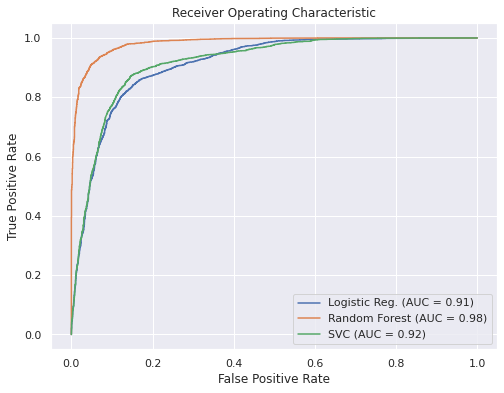

In [36]:
from sklearn import metrics
plt.figure(figsize=(8,6))

metrics.plot_roc_curve(logis, x_test, y_test, ax = plt.gca(),name = "Logistic Reg.")
metrics.plot_roc_curve(rf, x_test, y_test, ax = plt.gca(),name = "Random Forest")
metrics.plot_roc_curve(svc, x_test, y_test, ax = plt.gca(),name = "SVC")

plt.title('Receiver Operating Characteristic')

Text(0.5, 1.0, 'Precision-Recall curve')

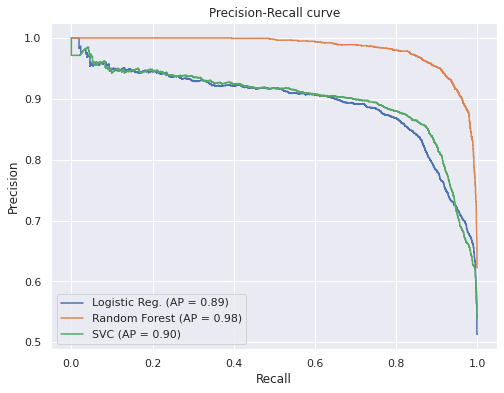

In [37]:

plt.figure(figsize=(8,6))

plot_precision_recall_curve(logis, x_test, y_test, ax = plt.gca(),name = "Logistic Reg.")
plot_precision_recall_curve(rf, x_test, y_test, ax = plt.gca(),name = "Random Forest")
plot_precision_recall_curve(svc, x_test, y_test, ax = plt.gca(),name = "SVC")

plt.title('Precision-Recall curve')